https://drive.google.com/file/d/1y0r1ES3krzQ5wf1ezLdRj7Vcn7JG4UlF/view?usp=sharing


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# drive.flush_and_unmount()

#yolov8 훈련하기 시작

dataset을 저장할 폴더를 만들고 그곳으로 들어갑니다

In [ ]:
!rm -rf dataset/
!rm -rf /content/runs/

In [ ]:
%mkdir dataset

In [ ]:
!cp /content/drive/MyDrive/Colab_Notebooks/box_training.zip /content/

In [ ]:
!unzip /content/box_training.zip -d dataset/

Archive:  /content/box_training.zip
   creating: dataset/box_training/
   creating: dataset/box_training/train/
   creating: dataset/box_training/train/images/
  inflating: dataset/box_training/train/images/S_box_img_0078.jpg  
  inflating: dataset/box_training/train/images/S_box_img_0053.jpg  
  inflating: dataset/box_training/train/images/S_box_img_0047.jpg  
  inflating: dataset/box_training/train/images/S_box_img_0058.jpg  
  inflating: dataset/box_training/train/images/S_box_img_0030.jpg  
  inflating: dataset/box_training/train/images/S_box_img_0003.jpg  
  inflating: dataset/box_training/train/images/S_box_img_0050.jpg  
  inflating: dataset/box_training/train/images/S_box_img_0011.jpg  
  inflating: dataset/box_training/train/images/S_box_img_0029.jpg  
  inflating: dataset/box_training/train/images/S_box_img_0074.jpg  
  inflating: dataset/box_training/train/images/S_box_img_0076.jpg  
  inflating: dataset/box_training/train/images/S_box_img_0043.jpg  
  inflating: dataset/box

In [ ]:
#%cd dataset

(320, 320, 3)


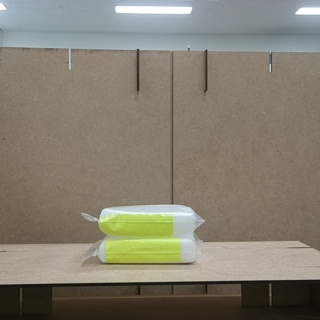

In [ ]:
# Check if image all loarded ok
import glob
import cv2
from google.colab.patches import cv2_imshow
import random


# 이미지 파일 경로를 가져오기
image_paths = glob.glob('/content/dataset/box_training/test/images/*.jpg')

# 이미지가 없는 경우 에러 처리
if not image_paths:
    print("이미지 파일이 없습니다.")
else:
    # 랜덤하게 이미지 선택
    selected_image_path = random.choice(image_paths)

    # 이미지 표시
    img = cv2.imread(selected_image_path)
    print(img.shape)
    cv2_imshow(img)

data.yaml을 확인합니다

In [ ]:
import yaml

data = {
        # 'train' : '/content/dataset/my_data/train/images',
        # 'test' : '/content/dataset/my_data/test/images',
        # 'val' : '/content/dataset/my_data/valid/images',
        'train' : '/content/dataset/box_training/train/images',
        'test' : '/content/dataset/box_training/test/images',
        'val' : '/content/dataset/box_training/valid/images',

        'nc': 4,
        'names': ['S_box','M_box','L_box','XL_box']
        # 'names': ['Truck','Dummy']
        # 'names': ['Normal','Error']
        # 'names' : ['NG', 'OK']
}

# with open('/content/dataset/my_data/custom_data.yaml', 'w') as f:
with open('/content/dataset/custom_data.yaml', 'w') as f:
  yaml.dump(data, f)

custom_data.yaml 파일을 만들었으니 제대로 작성이 되었는지 확인합니다

In [ ]:
# with open('/content/dataset/my_data/custom_data.yaml', 'r') as f:
with open('/content/dataset/custom_data.yaml', 'r') as f:
  view_yaml = yaml.safe_load(f)
  display(view_yaml)


{'names': ['S_box', 'M_box', 'L_box', 'XL_box'],
 'nc': 4,
 'test': '/content/dataset/box_training/test/images',
 'train': '/content/dataset/box_training/train/images',
 'val': '/content/dataset/box_training/valid/images'}

yolov8을 인스톨합니다

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.0 MB/s eta 0:00:00


yolov8이 제대로 설치가 되었는지 확인합니다

In [ ]:
import ultralytics

ultralytics.checks()

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.2/112.6 GB disk)


사전에 학습된 yolov8n.pt를 가져오고 적용시킵니다

yolov8의 학습파일은 yolov8n.pt, yolov8s.pt, yolov8m.pt, yolov8l.pt, yolov8x.pt 등이 있습니다

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

yolov8에서 사용하는 model이 yolov8n.pt 인지 확인해봅니다

yolov8은 cocodata의 분류를 가져서 80개의 name이 저장되어있습니다

In [ ]:
print(type(model.names),len(model.names))

print(model.names)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

우리가 원하는 데이터셋 경로를 가진 custom_data.yaml을 가지고 학습을 시작합니다

In [ ]:
# model.train(data='/content/dataset/my_data/custom_data.yaml', epochs= 100, patience = 20, batch=32, imgsz =640)
model.train(data='/content/dataset/custom_data.yaml', epochs= 50, patience = 20, batch=32, imgsz =640)

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/custom_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, p

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a62d0531730>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

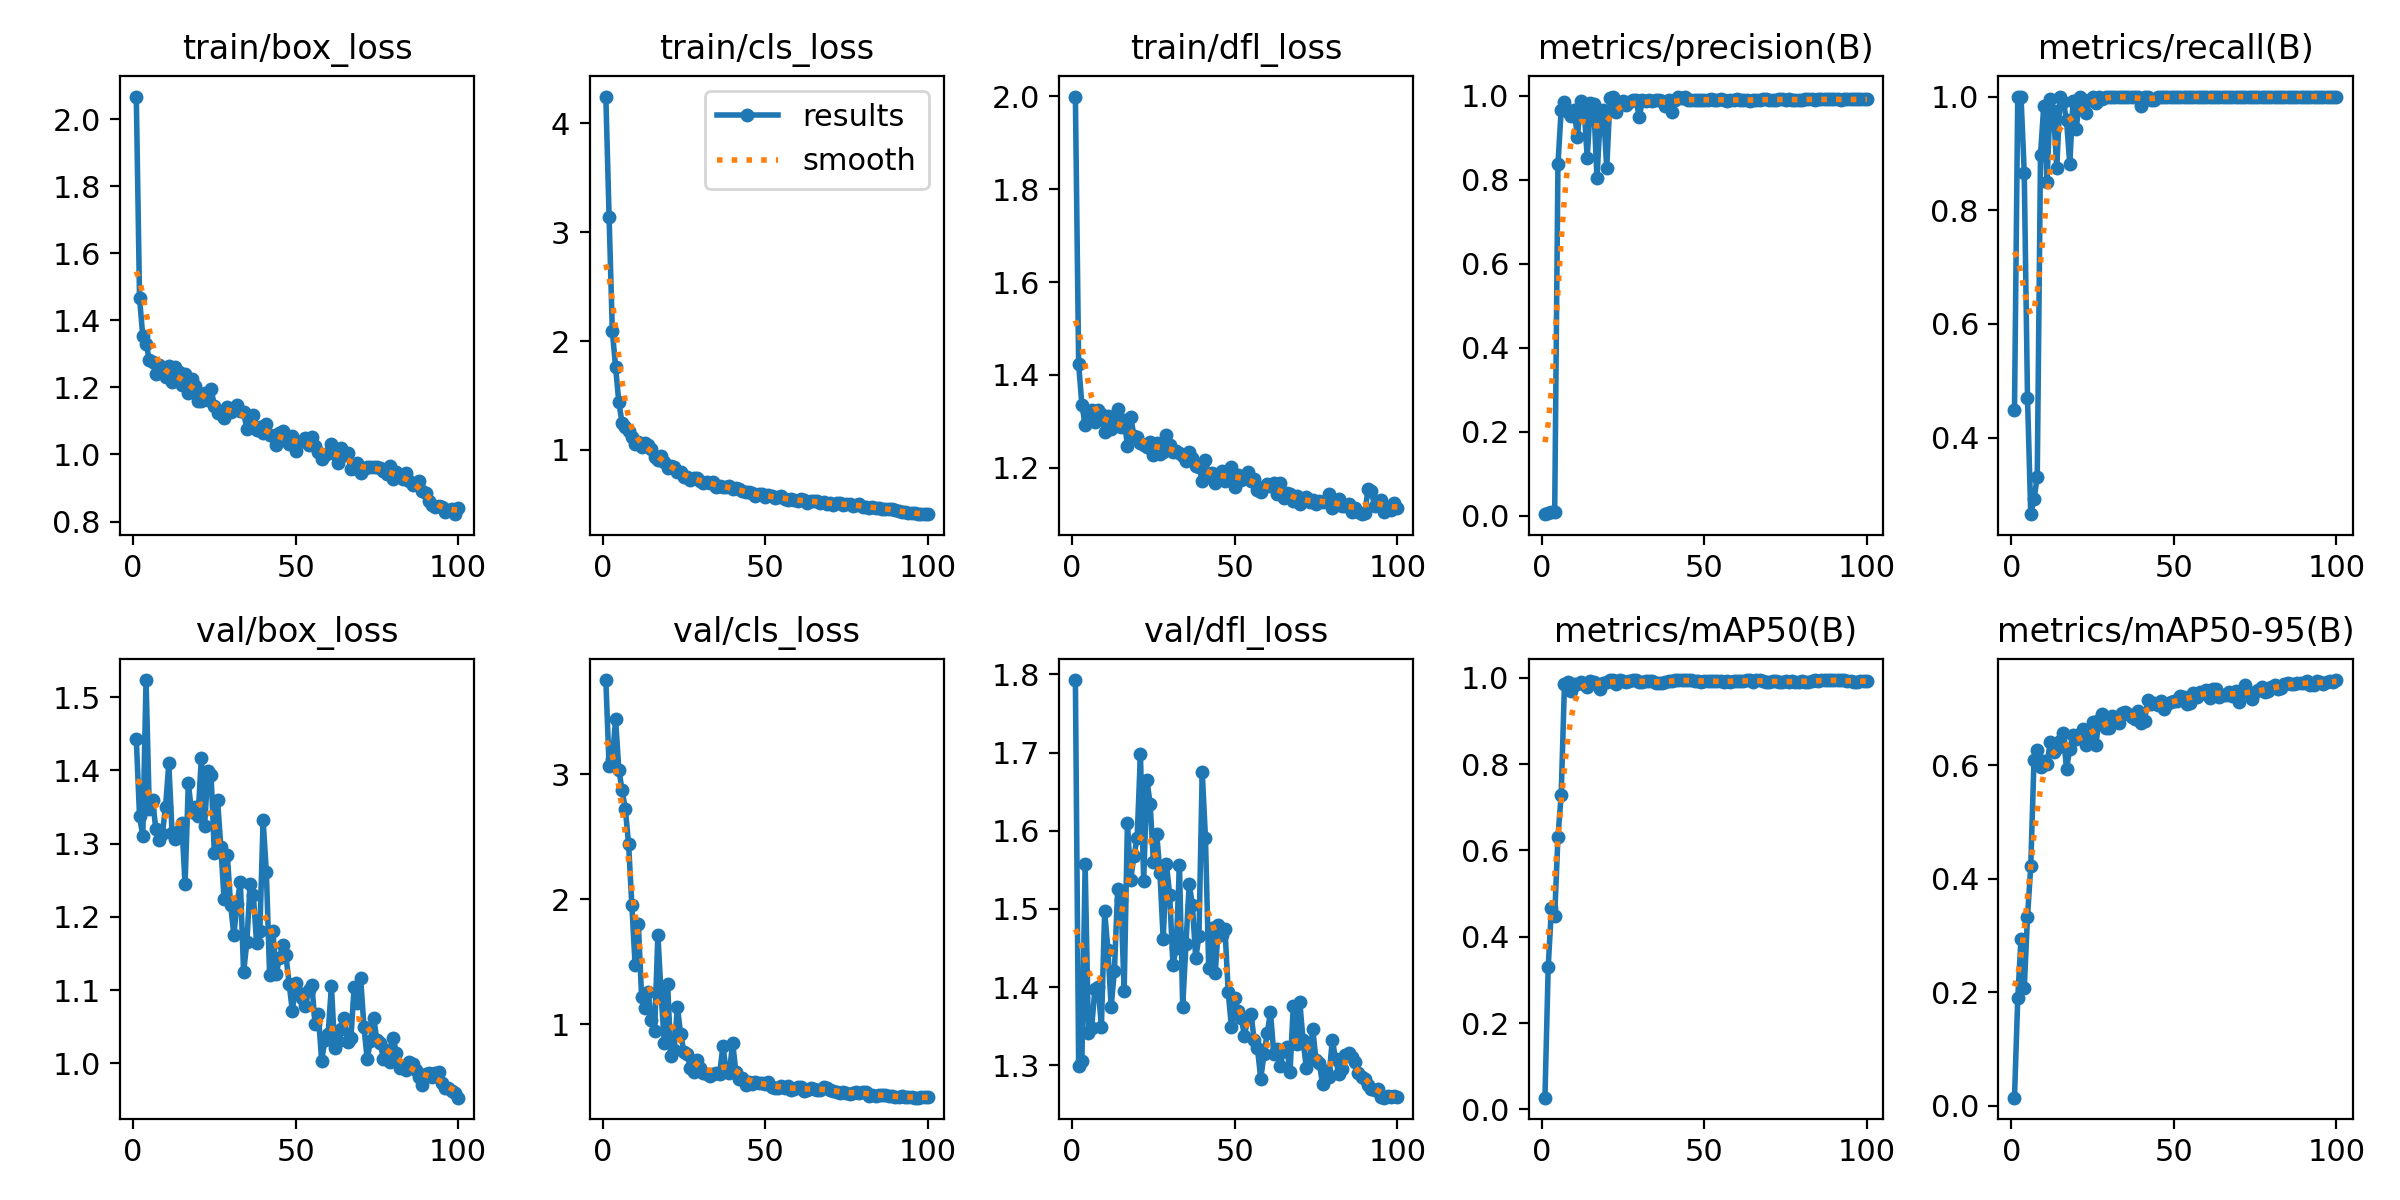

In [ ]:
from IPython.display import Image, clear_output
Image(filename='/content/runs/detect/train/results.png',width=1000)

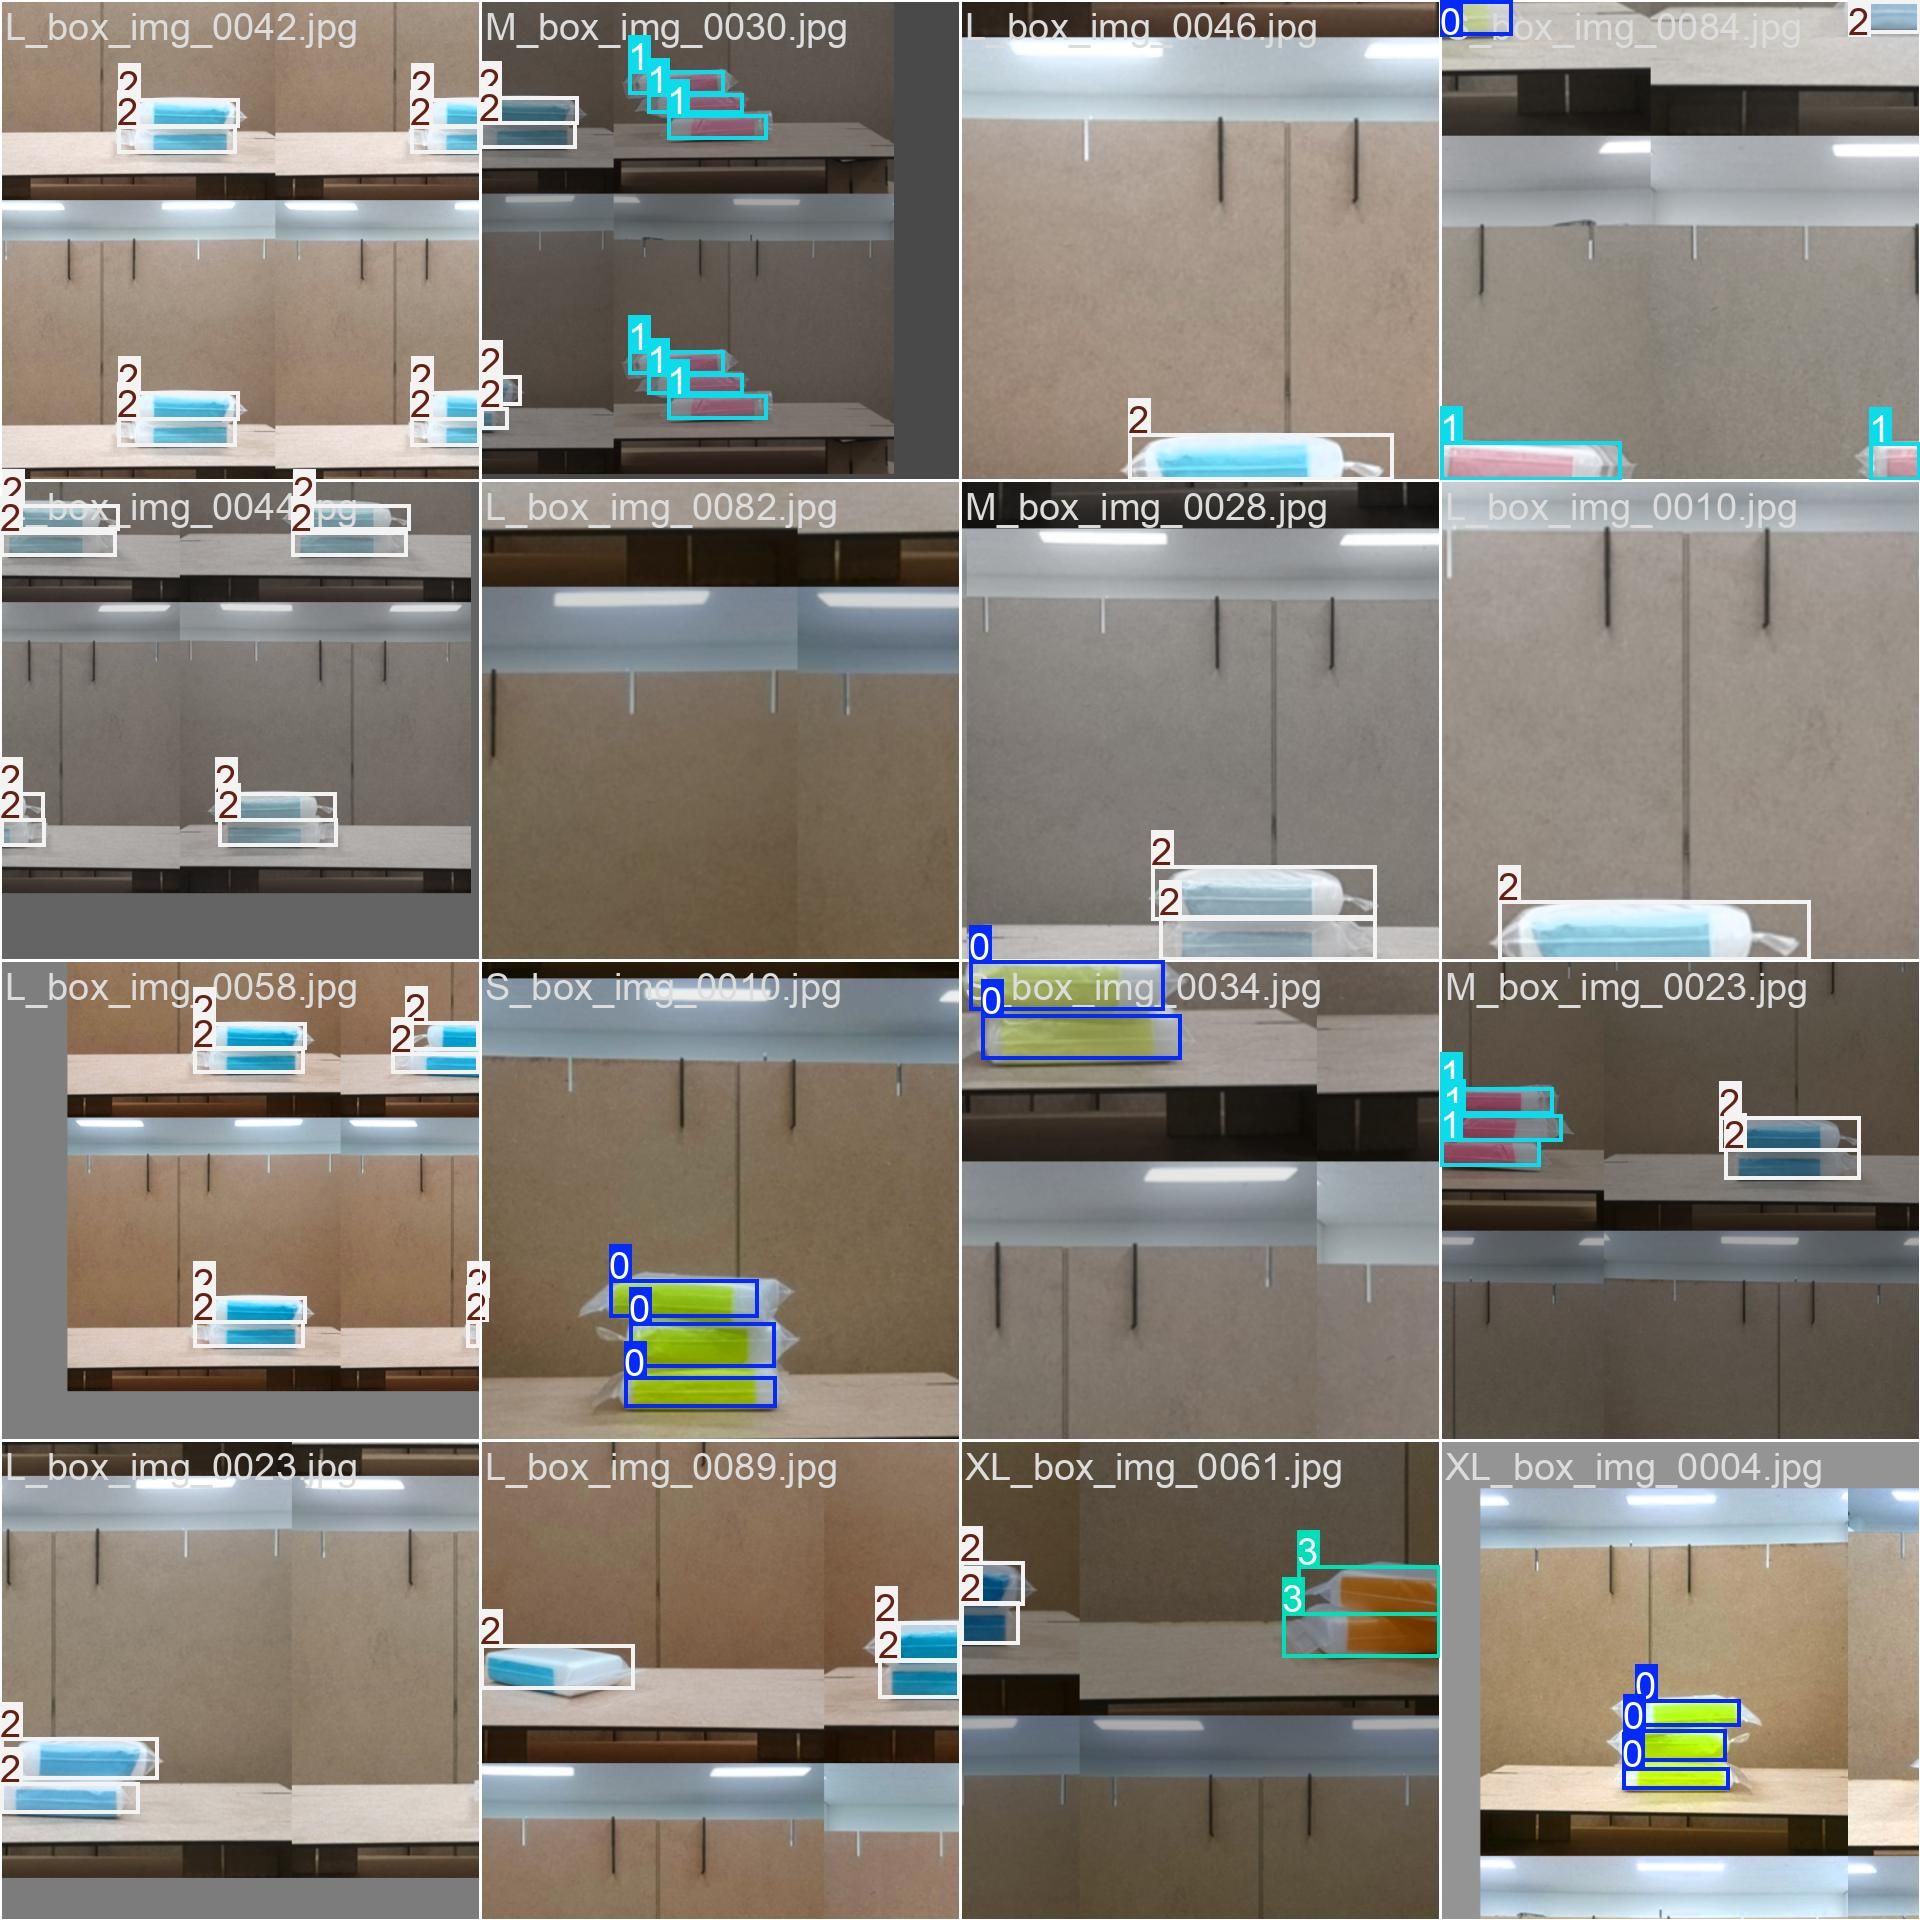

In [ ]:
Image(filename='/content/runs/detect/train/train_batch0.jpg',width=1000)
# Image(filename='/content/runs/detect/train3/train_batch0.jpg',width=1000)

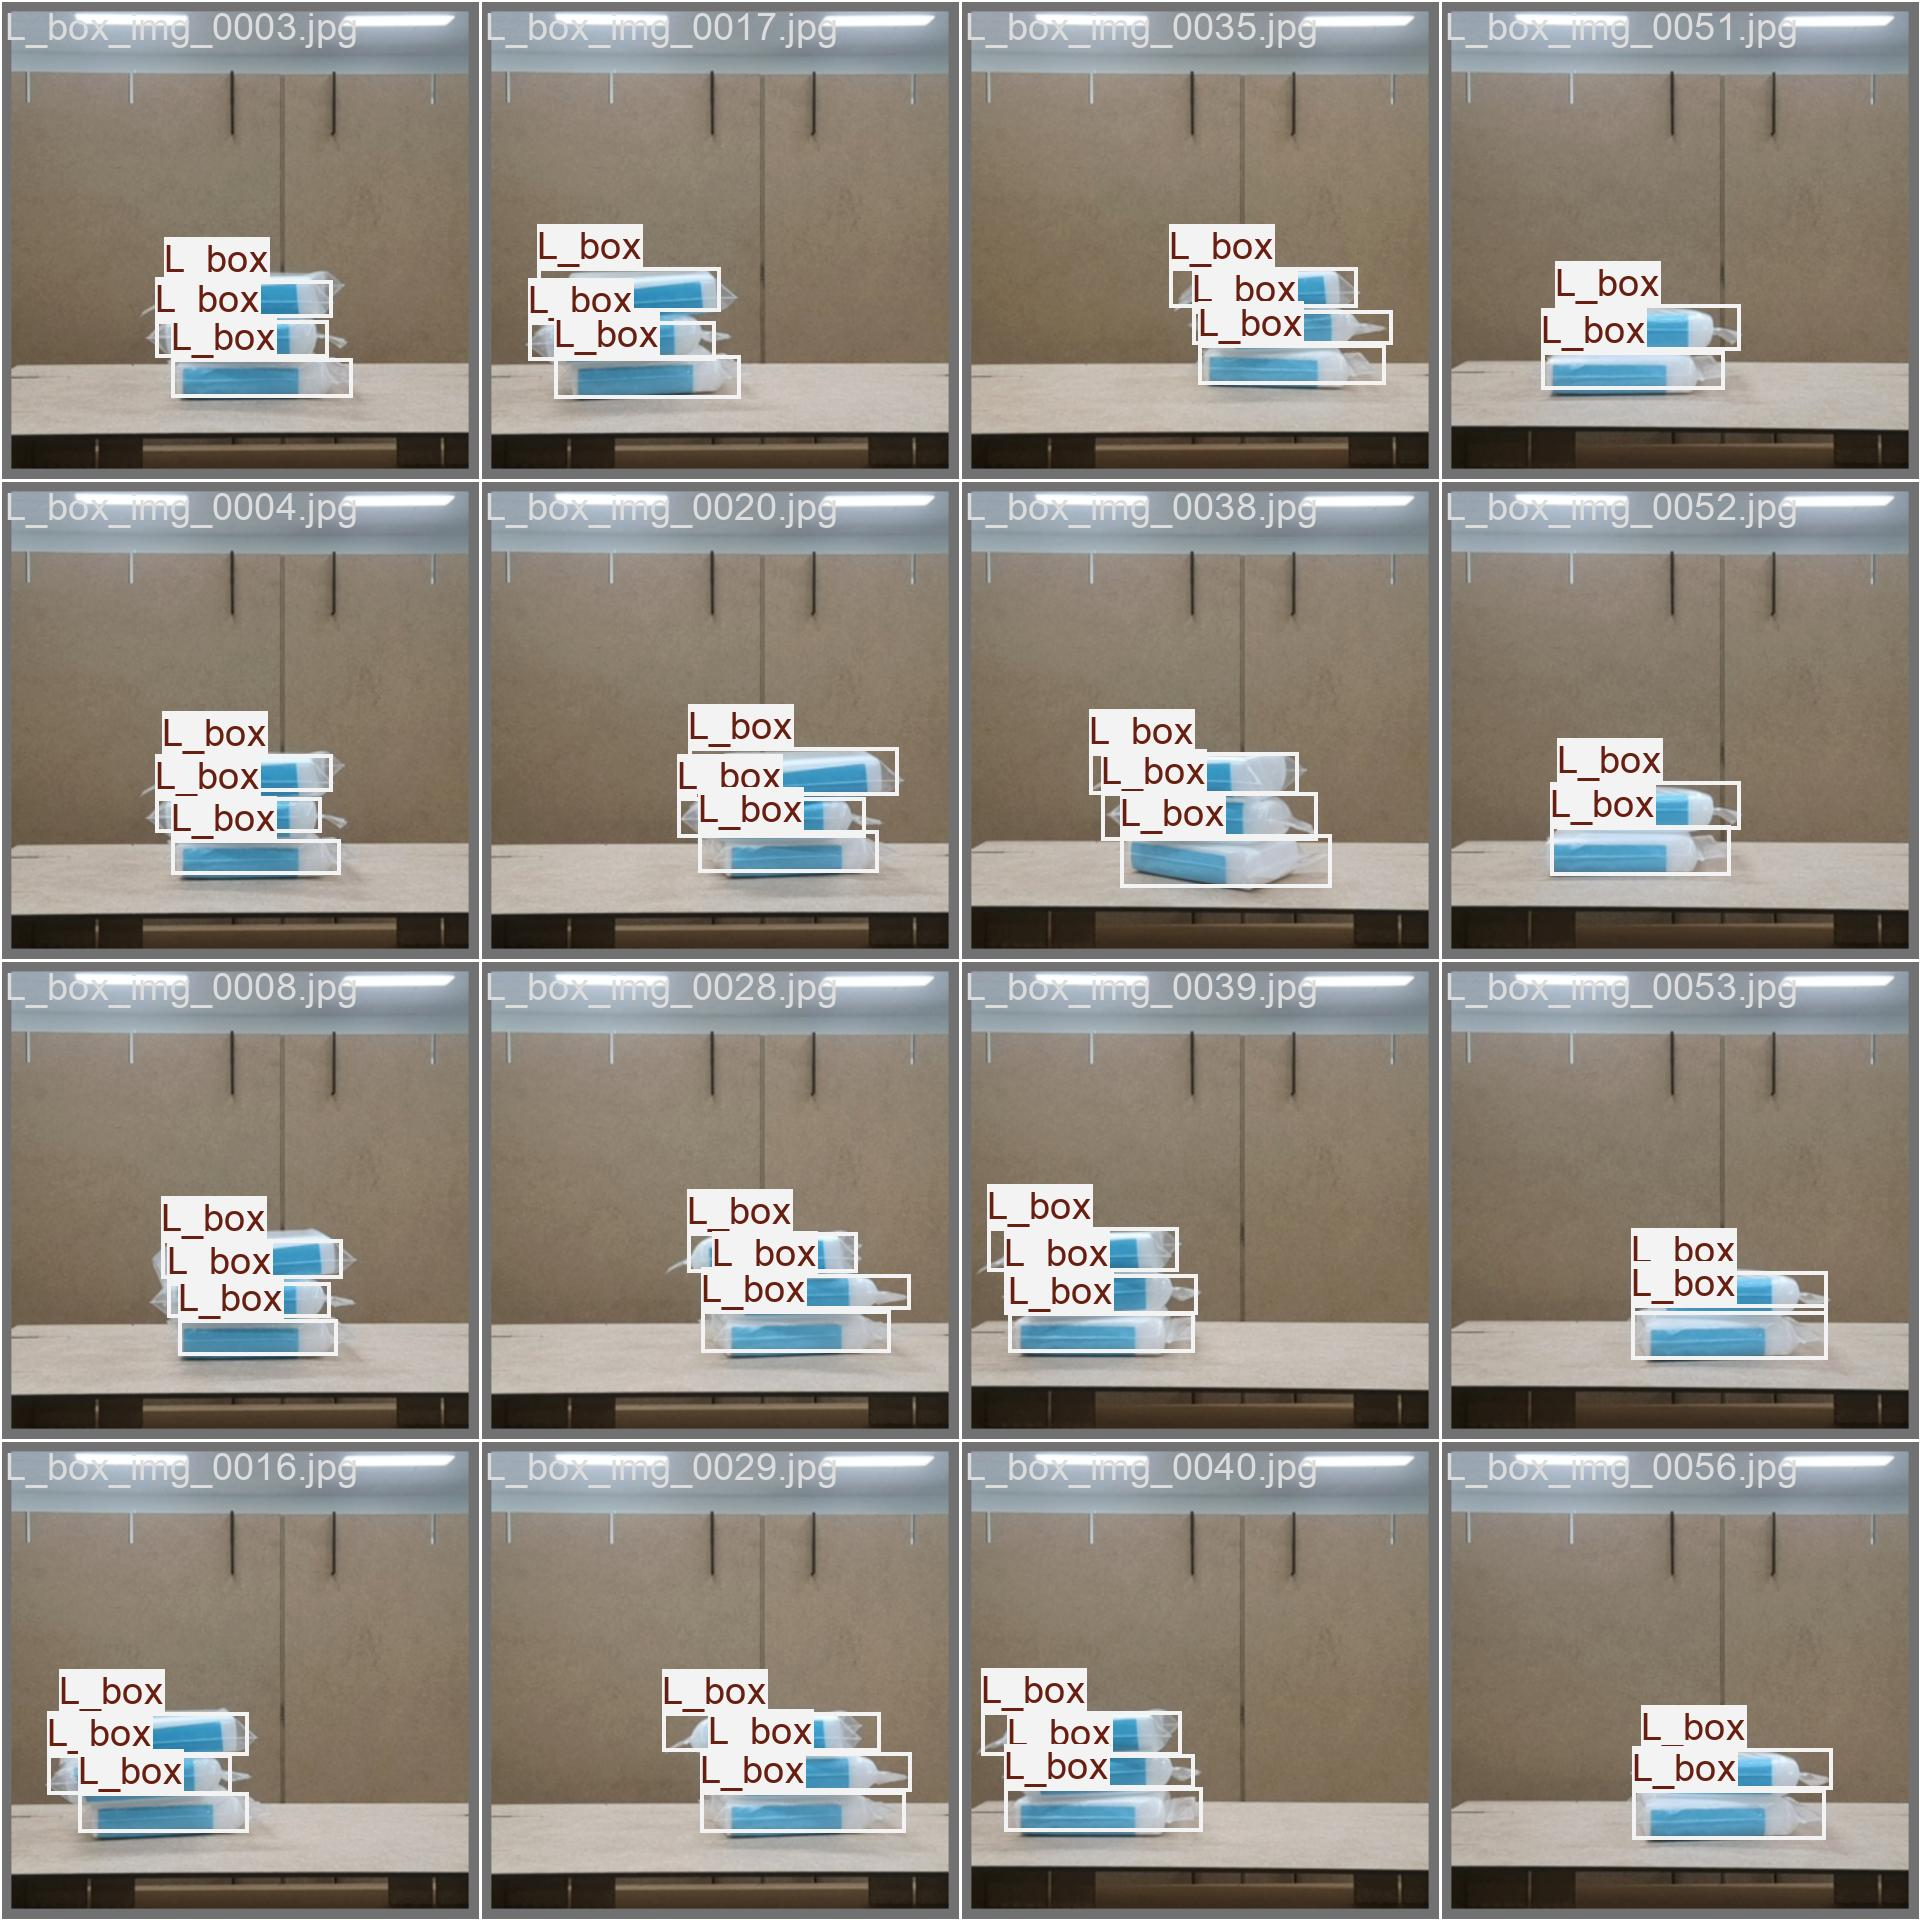

In [ ]:
Image(filename='/content/runs/detect/train/val_batch0_labels.jpg',width=1000)


In [ ]:
print(type(model.names),len(model.names))

print(model.names)

<class 'dict'> 4
{0: 'S_box', 1: 'M_box', 2: 'L_box', 3: 'XL_box'}


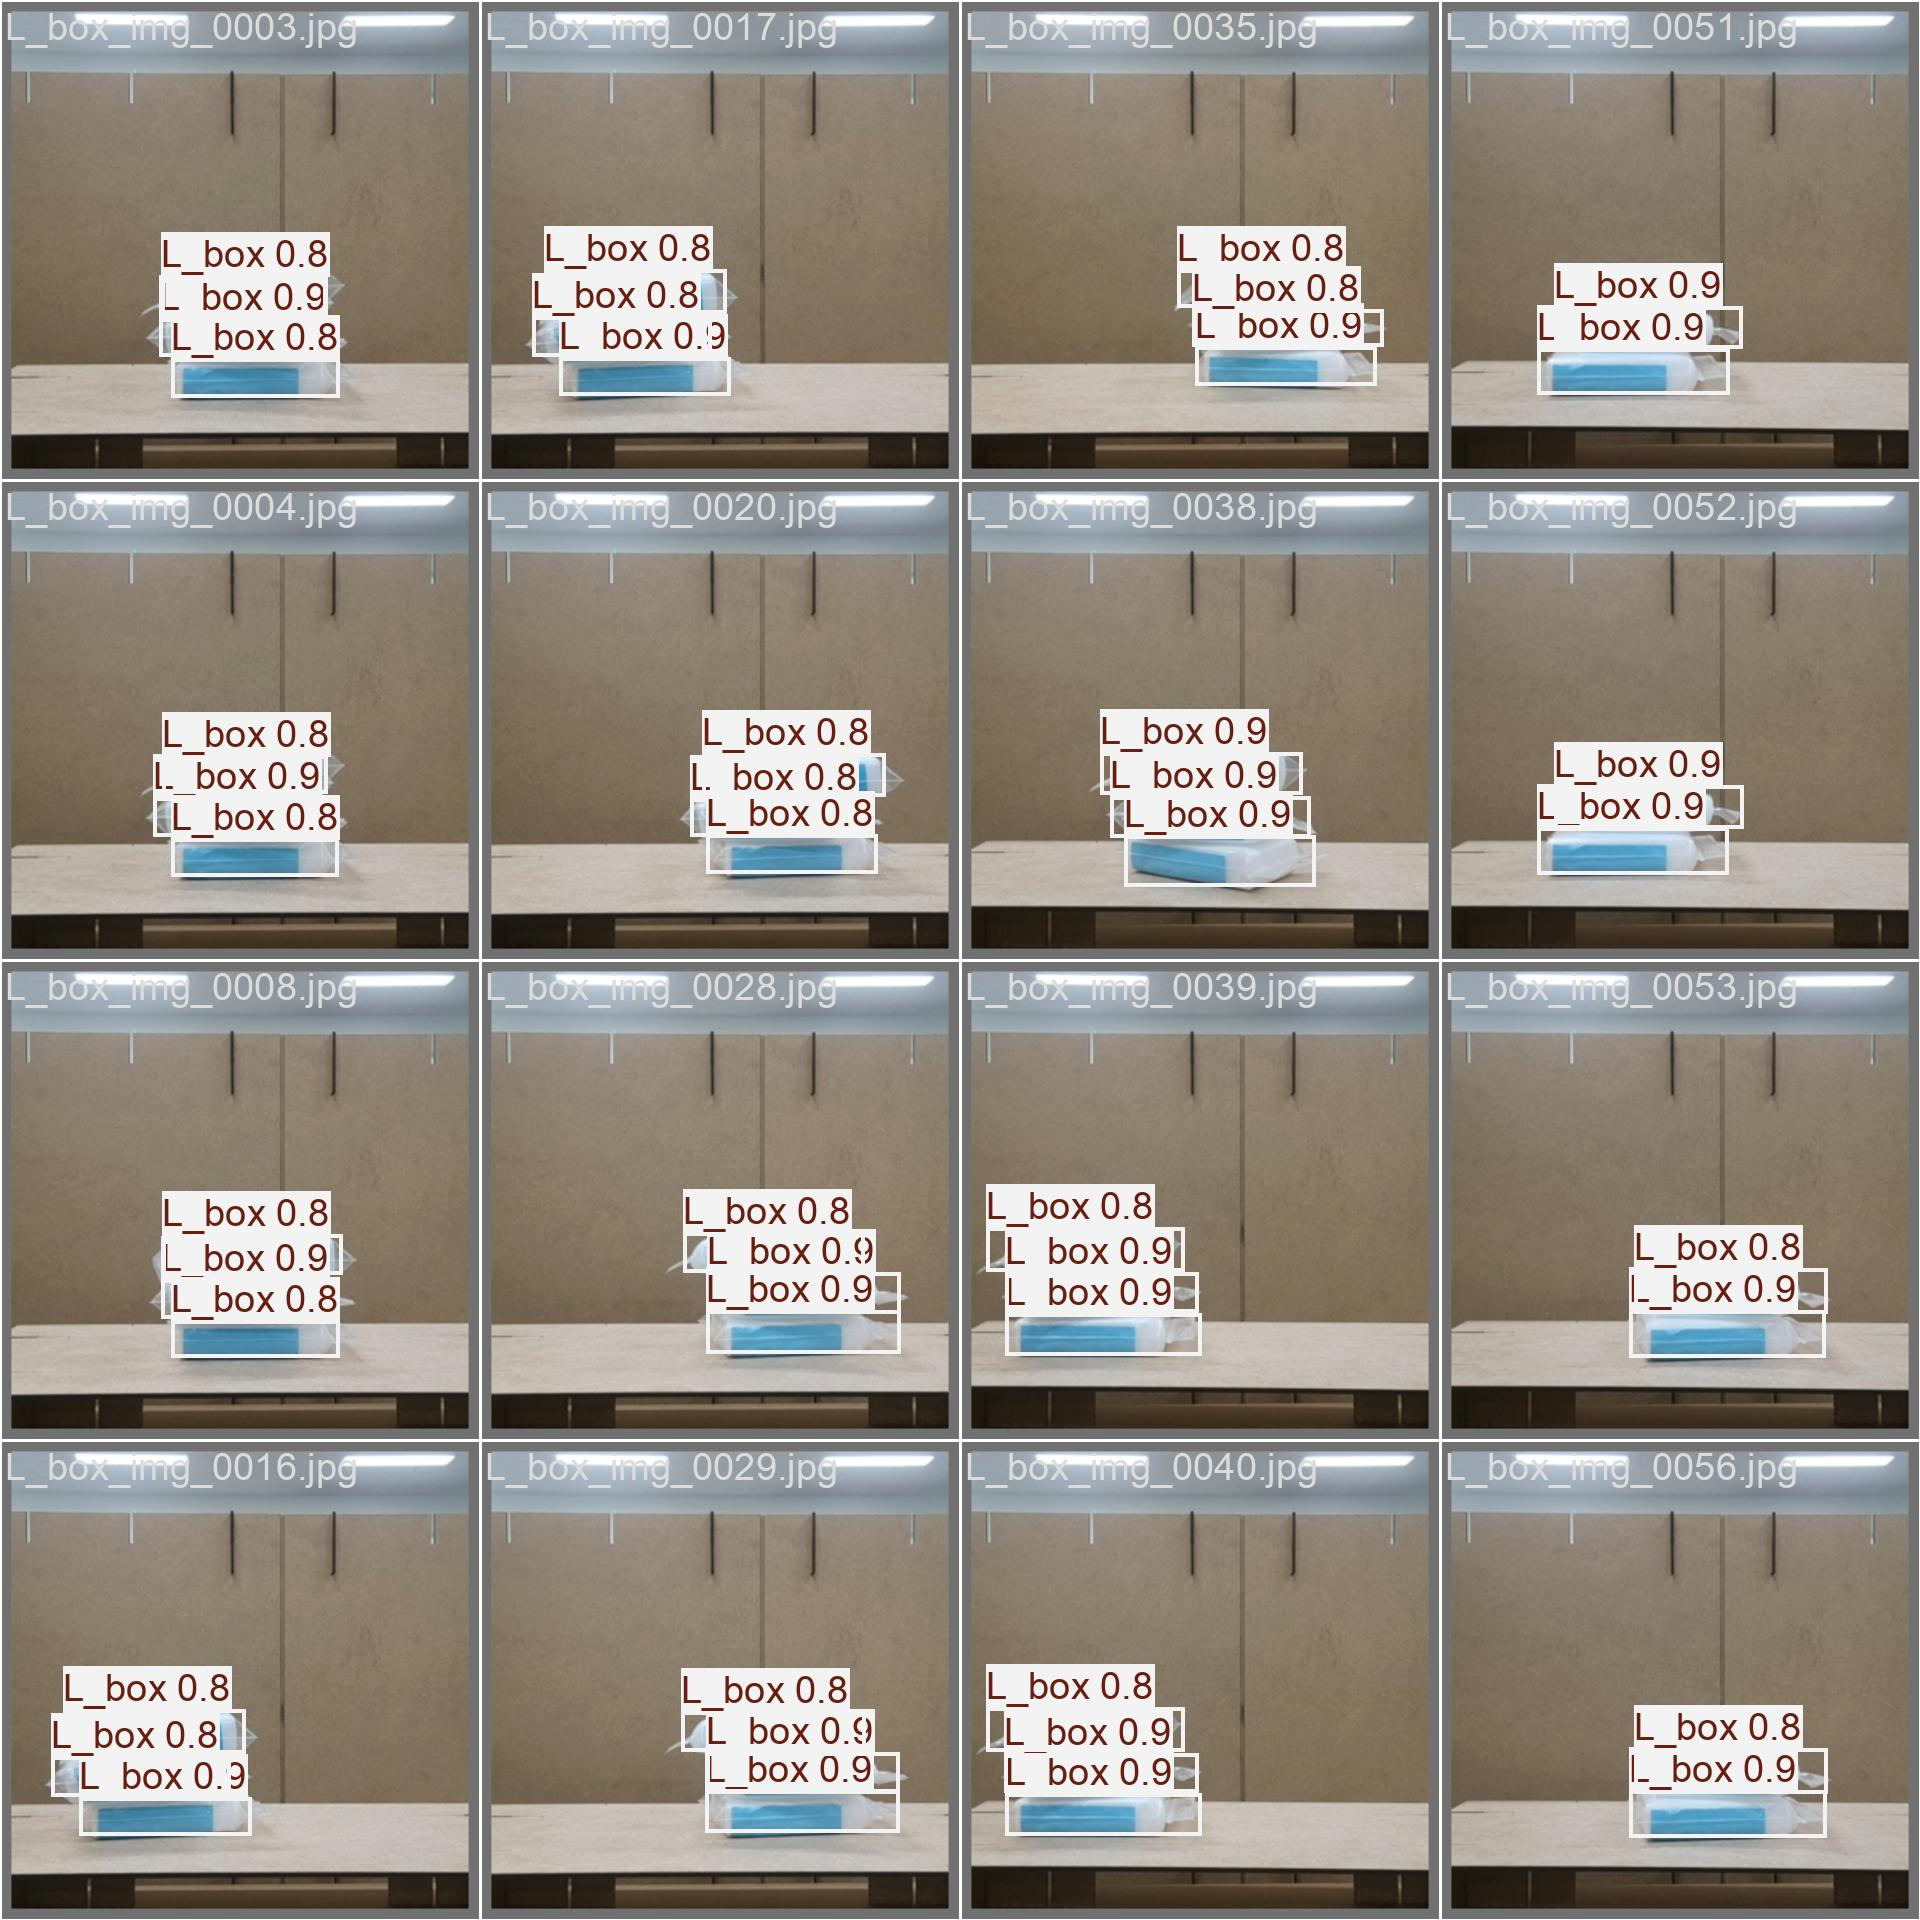

In [ ]:
Image(filename='/content/runs/detect/train/val_batch0_pred.jpg',width=1000)

학습된 결과물을 출력하는 부분입니다

마지막 출력문인 'Results saved to '이후에 나오는 경로가 학습된 이미지 출력이 있는 폴더의 경로입니다

image.png

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [ ]:
print(type(model.names),len(model.names))

print(model.names)

<class 'dict'> 4
{0: 'S_box', 1: 'M_box', 2: 'L_box', 3: 'XL_box'}


In [ ]:
# 테스트 이미지

from glob import glob

test_image_list = glob('/content/dataset/test/images/*')

print(len(test_image_list))

test_image_list.sort()

for i in range(len(test_image_list)):

    print('i = ',i, test_image_list[i])

0


In [ ]:
# results = model.predict(source ='/content/dataset/my_data/test/images/', save=True)
results = model.predict(source ='/content/dataset/box_training/test/images/', save=True)


image 1/44 /content/dataset/box_training/test/images/L_box_img_0002.jpg: 640x640 3 L_boxs, 15.1ms
image 2/44 /content/dataset/box_training/test/images/L_box_img_0019.jpg: 640x640 3 L_boxs, 7.2ms
image 3/44 /content/dataset/box_training/test/images/L_box_img_0033.jpg: 640x640 3 L_boxs, 7.2ms
image 4/44 /content/dataset/box_training/test/images/L_box_img_0055.jpg: 640x640 2 L_boxs, 6.6ms
image 5/44 /content/dataset/box_training/test/images/L_box_img_0065.jpg: 640x640 2 L_boxs, 5.6ms
image 6/44 /content/dataset/box_training/test/images/L_box_img_0077.jpg: 640x640 2 L_boxs, 5.4ms
image 7/44 /content/dataset/box_training/test/images/L_box_img_0079.jpg: 640x640 2 L_boxs, 5.5ms
image 8/44 /content/dataset/box_training/test/images/L_box_img_0083.jpg: 640x640 1 L_box, 6.2ms
image 9/44 /content/dataset/box_training/test/images/L_box_img_0088.jpg: 640x640 1 L_box, 5.5ms
image 10/44 /content/dataset/box_training/test/images/L_box_img_0092.jpg: 640x640 1 L_box, 5.6ms
image 11/44 /content/dataset/b

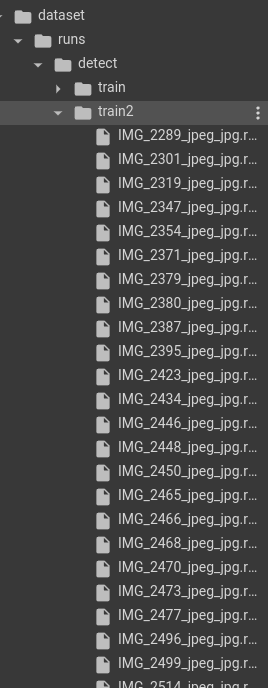

해당 경로에서 랜덤으로 이미지 출력을 보는 코드입니다

colab은 특수한 패키지를 사용해야 볼 수 있습니다

In [ ]:
# 이미지 파일 경로를 가져오기
# image_paths = glob('/content/runs/detect/predict2/*.jpg')
image_paths = glob('/content/runs/detect/predict/*.jpg')

# 이미지가 없는 경우 에러 처리
if not image_paths:
    print("이미지 파일이 없습니다.")
else:
    # 랜덤하게 이미지 선택
    # selected_image_path = random.choice(image_paths)
    # 이미지 표시
    # img = cv2.imread(selected_image_path)

    for image_path in image_paths:
      img = cv2.imread(image_path)
      cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

만약 실제로 학습한 데이터를 자신의 드라이브에 저장하고 싶다면

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
# !cp /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/My_Colab_Notebooks/Doosan
!cp /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/Colab_Notebooks/box_yolo8n.pt
